In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from matplotlib import pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFECV

import seaborn as sns
import pickle

In [3]:
news = pd.read_csv('OnlineNewsPopularity.csv')

In [ ]:
news.shape

In [ ]:
news.columns

In [ ]:
news.head()

In [ ]:
news[news[' average_token_length'] == 0].url.head()
# checked why the average word length for these articles is 0 by going to the url manually 

In [4]:
#  dropping columns that do not give me average data and where attribute information is unclear
dropped_news = news.drop(columns=['url', ' timedelta', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
                                  ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
                                  ' min_positive_polarity', ' max_positive_polarity', ' min_negative_polarity',
                                  ' max_negative_polarity', ' self_reference_min_shares',
                                  ' self_reference_max_shares'])

In [5]:
dropped_news.rename(columns=lambda x: x.lstrip(), inplace=True)

In [6]:
dropped_news['average_token_length'].replace(0, np.nan, inplace=True)
dropped_news.dropna(subset=['average_token_length'], inplace=True)
# dropped rows where average token(word) length is 0 because Mashable could not find the page (as in it doesn't
# exist anymore)

In [ ]:
dropped_news.shape

In [ ]:
dropped_news['shares'].describe()

In [ ]:
dropped_news.isnull().nunique()
# check to see if my data has null values --> it does not

In [ ]:
dropped_news.describe()

# removing features with VIF coefficient higher than 10

In [7]:
dropped_news.drop(columns=['n_unique_tokens', 'n_non_stop_unique_tokens', 'rate_positive_words',
                           'rate_negative_words'], inplace=True)


In [ ]:
with open('dropped_news_df', 'wb') as handle:
    pickle.dump(dropped_news, handle, protocol=pickle.HIGHEST_PROTOCOL)

# EDA looking at relationship between 'shares' and other variables

In [ ]:
sns.pairplot(dropped_news)
# pairplot is unreadable so I decided to look at the relationships between shares and the rest of the variables

In [ ]:
dropped_news.hist(figsize=(20,20))
plt.show

In [ ]:
sns.distplot(dropped_news.shares)
# this distribution is not normally distributed so i graphed the log of the target in the cell below, which 
# normalized the graph

In [ ]:
sns.distplot(np.log(dropped_news.shares))

In [ ]:
dropped_news.plot.scatter('n_tokens_title', 'shares')

In [ ]:
dropped_news.plot.scatter('n_tokens_content', 'shares')

In [ ]:
dropped_news.plot.scatter('n_unique_tokens', 'shares')

In [ ]:
dropped_news.plot.scatter('num_hrefs', 'shares')

In [ ]:
dropped_news.plot.scatter('num_self_hrefs', 'shares')

In [ ]:
dropped_news.plot.scatter('num_imgs', 'shares')

In [ ]:
dropped_news.plot.scatter('num_videos', 'shares')

In [ ]:
dropped_news.plot.scatter('average_token_length', 'shares')
# what does it mean when the average length of words in the content is 0

In [ ]:
dropped_news.plot.scatter('data_channel_is_lifestyle', 'shares')

In [ ]:
dropped_news.plot.scatter('data_channel_is_entertainment', 'shares')

In [ ]:
dropped_news.plot.scatter('data_channel_is_bus', 'shares')

In [ ]:
dropped_news.plot.scatter('data_channel_is_socmed', 'shares')

In [ ]:
dropped_news.plot.scatter('is_weekend', 'shares')

In [ ]:
dropped_news.plot.scatter('weekday_is_monday', 'shares')

In [ ]:
dropped_news.plot.scatter('weekday_is_tuesday', 'shares')

In [ ]:
dropped_news.plot.scatter('weekday_is_wednesday', 'shares')

In [ ]:
dropped_news.plot.scatter('weekday_is_thursday', 'shares')

In [ ]:
dropped_news.plot.scatter('weekday_is_friday', 'shares')

In [ ]:
dropped_news.plot.scatter('LDA_00', 'shares')

In [ ]:
dropped_news.plot.scatter('LDA_01', 'shares')

In [ ]:
dropped_news.plot.scatter('LDA_02', 'shares')

In [ ]:
dropped_news.plot.scatter('LDA_03', 'shares')

In [ ]:
dropped_news.plot.scatter('LDA_04', 'shares')

In [ ]:
dropped_news.plot.scatter('self_reference_avg_sharess', 'shares')

do people value opinion pieces less than pieces based on fact?

In [ ]:
dropped_news.plot.scatter('global_subjectivity', 'shares')
# text subjectivity
# if the text has no subjectivity then, on average it receives more shares than subjective text

In [ ]:
dropped_news.plot.scatter('global_sentiment_polarity', 'shares')
# text sentiment polarity

what affect does the wording have on the amount of shares?

In [ ]:
dropped_news.plot.scatter('global_rate_positive_words', 'shares')

# an article is on average more likely to be shared if there are no positive words in the article, but
# articles with more positive words are shared more often than articles with negative words (on average)

In [ ]:
dropped_news.plot.scatter('global_rate_negative_words', 'shares')

does the authors of the news stories having a bias towards a certain polarity of word choice have an affect on the number of shares the article receives?

In [ ]:
dropped_news.plot.scatter('rate_positive_words', 'shares')
# higher rate of positive words than negative words

In [ ]:
dropped_news.plot.scatter('rate_negative_words', 'shares')

In [ ]:
dropped_news.plot.scatter('avg_positive_polarity', 'shares')

In [ ]:
dropped_news.plot.scatter('avg_negative_polarity', 'shares')

In [ ]:
dropped_news.plot.scatter('title_subjectivity', 'shares')

In [ ]:
dropped_news.plot.scatter('title_sentiment_polarity', 'shares')

In [ ]:
dropped_news.plot.scatter('abs_title_subjectivity', 'shares')

In [ ]:
dropped_news.plot.scatter('abs_title_sentiment_polarity', 'shares')

In [ ]:
dropped_news.corr()

# Meaningful EDAs

In [14]:
day_conditions = [dropped_news.weekday_is_monday == 1, dropped_news.weekday_is_tuesday == 1,
              dropped_news.weekday_is_wednesday == 1, dropped_news.weekday_is_thursday == 1,
              dropped_news.weekday_is_friday == 1, dropped_news.weekday_is_saturday == 1,
              dropped_news.weekday_is_sunday == 1]
day_choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dropped_news['day_of_week'] = np.select(day_conditions, day_choices, np.nan)

In [ ]:
# dropped_news.day_of_week.isnull().nunique()
## checked for null values

Text(0, 0.5, 'Number of Shares')

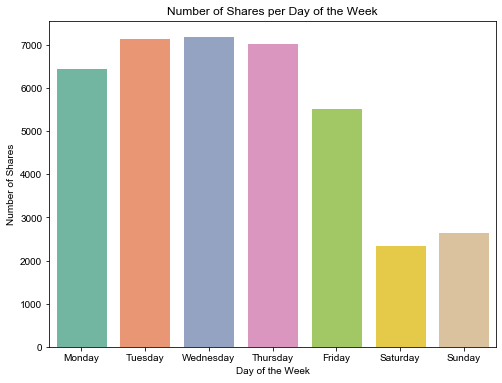

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid')
sns.set_context('notebook')
ax = sns.countplot(x="day_of_week", data=dropped_news, palette='Set2')
plt.title('Number of Shares per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Shares')

Articles are less likely to be shared during the weekend; more likely to be shared in the middle of the week rather than the beginning or end of the week

In [ ]:
lda_conditions = [dropped_news['LDA_00'] == 1, dropped_news.LDA_01 == 1, dropped_news.LDA_02 == 1,
                  dropped_news.LDA_03 == 1, dropped_news.LDA_04 == 1]
lda_choices = ['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
dropped_news['lda'] = np.select(lda_conditions, lda_choices, np.nan)

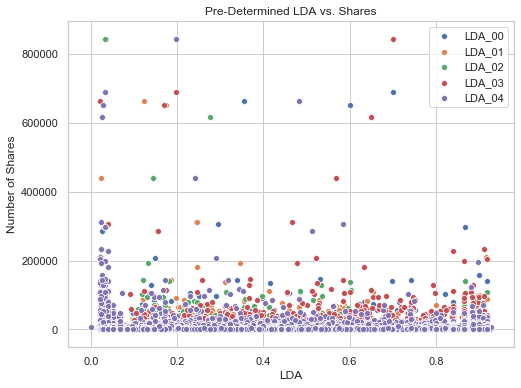

In [23]:
# attempt at graphing LDA
fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid')
sns.set_context('notebook')
ax = sns.scatterplot(x='LDA_00', y='shares', data=dropped_news, ax=ax)
ax = sns.scatterplot(x='LDA_01', y='shares', data=dropped_news, ax=ax)
ax = sns.scatterplot(x='LDA_02', y='shares', data=dropped_news, ax=ax)
ax = sns.scatterplot(x='LDA_03', y='shares', data=dropped_news, ax=ax)
ax = sns.scatterplot(x='LDA_04', y='shares', data=dropped_news, ax=ax)
plt.title('Pre-Determined LDA vs. Shares')
plt.xlabel('LDA')
plt.ylabel('Number of Shares')
plt.legend(['LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'])

In [18]:
channel_conditions = [dropped_news.data_channel_is_lifestyle == 1, dropped_news.data_channel_is_entertainment == 1,
                      dropped_news.data_channel_is_bus == 1, dropped_news.data_channel_is_socmed == 1,
                      dropped_news.data_channel_is_tech == 1, dropped_news.data_channel_is_world == 1]
channel_choices = ['Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Tech', 'World']
dropped_news['channels'] = np.select(channel_conditions, channel_choices, 'No Genre')

Text(0, 0.5, 'Number of Shares')

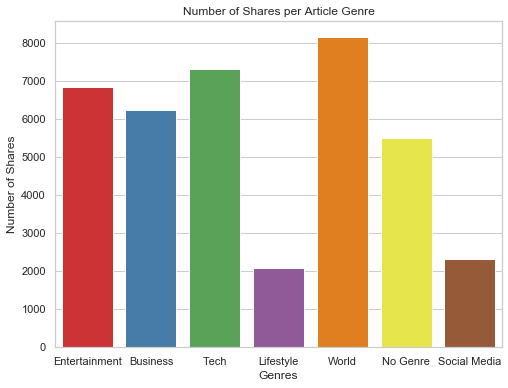

In [19]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set(style='whitegrid')
sns.set_context('notebook')
ax = sns.countplot(x="channels", data=dropped_news, palette='Set1')
plt.title('Number of Shares per Article Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Shares')

Mashable's readers tend to value world and tech news more than entertainment, but still value "professional-type" news stories over "leisure-type" stories

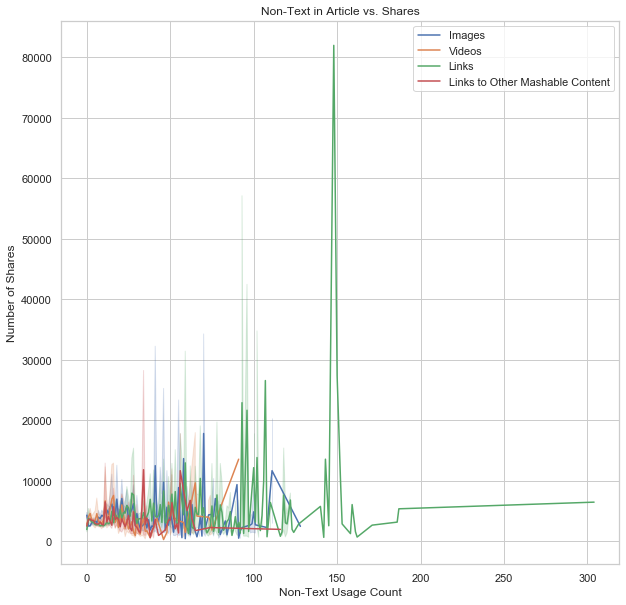

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set(style='whitegrid')
sns.set_context('notebook')
ax = sns.lineplot(x='num_imgs', y='shares', data=dropped_news, ax=ax)
ax = sns.lineplot(x='num_videos', y='shares', data=dropped_news, ax=ax)
ax = sns.lineplot(x='num_hrefs', y='shares', data=dropped_news, ax=ax)
ax = sns.lineplot(x='num_self_hrefs', y='shares', data=dropped_news, ax=ax)
plt.title('Non-Text in Article vs. Shares')
plt.xlabel('Non-Text Usage Count')
plt.ylabel('Number of Shares')
plt.legend(['Images', 'Videos', 'Links', 'Links to Other Mashable Content'])

I initially looked at the pairplot, which was completely unreadable, so I moved on to visualizations of the variables to the target variable. I used the 4 categories that I felt would have the most impact on the number of shares. I was mostly surprised by the "Genres" EDA because World news shares outnumbered Tech news shares by nearly a thousand (knowing that Mashable is a tech-oriented publisher).